<h1 align="center">Decision Tree - Practical Part </h2>
<h2> Learning Objectives:</h2>

   
*  Practice different statistical and data visualization  techniques to describe the characteristics of a given dataset. 
* Understand the notion of decision trees and its use to implement classification models.
* Understand the notion of cost-complexity pruning and its use to reduce model variance.
* Train a decision tree model and assess its perfomance. 



# Import

Add all import statements in this section.



In [ ]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot as plt


# Dataset

In this part, you will use the car evaluation database, which was  derived from a simple hierarchical decision model. (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.).

The model uses six attributes:

*   buying: Car Buying Price. This attribute has four values: vhigh, high, med, low.
*   maint: Price of the Maintenance.  This attribute has four values: vhigh, high, med, low.
*   doors: Number of Doors. This attribute has four values: 2, 3, 4, 5-more.
*   persons: Capacity in terms of persons to carry. This attribute has three values: 2, 4, more.
*   lug_boot: The Size of Luggage Boot. This attribute has three values: small, med, big.
*   safety: Estimated Safety of the Car. This attribute has three values: low, med, high.

Using the above attributes, it is required to use a decision tree to evalute the car into one of the given values:


*   unacc: Unacceptable
*   acc: Acceptable
*   good: Good
*   vgood: Very Good











# Dataset Exploration 
Using pandas library, load the dataset into a data frame. Display the first 4 rows of the dataset.


In [ ]:
data = pd.read_csv("car.csv")
data.head()

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Print the dataset information including the type of data in each column and the number of non-null values. Does the dataset has any missing values?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   car_acc   1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Find the number of cars in each evaluation category (i.e. the number of cars classified as acceptable, unacceptable, good and very good. Is this dataset balanced? why?

In [ ]:
data['car_acc'].value_counts().sort_index()

acc       384
good       69
unacc    1210
vgood      65
Name: car_acc, dtype: int64

# Data Pre-Processing

Replace the value of '5more' in the 'doors' attribute with 5.
Replace the value of 'more' in the 'person' attribute with 5.


In [ ]:
data.doors.replace(('5more'),('5'),inplace=True)
data.persons.replace(('more'),('5'),inplace=True)

There are several encoding mechnaisms that can be used to transform categorical values including one-hot encoding, label encoding, and ordinal encoding. Which encoding mechnism do you recommend for each attribute? why?

Encode the data according to your recommended encoding mechanism.


In [ ]:
# I am using ordinal encoding to retain the ordinal nature of variables. Other encoding mechanisms can be used as well

low_high_dict={
    'low' : 1,
    'med' : 2,
    'high' : 3,
    'vhigh' : 4
}
small_big_dict={
    'small' : 1,
    'med' : 2,
    'big' : 3
}
evaluation_dict={
    'unacc': 1,
    'acc': 2,
    'good': 3,
    'vgood': 4
}
data['buying']=data.buying.map(low_high_dict)
data['maint']=data.maint.map(low_high_dict)
data['safety']=data.safety.map(low_high_dict)
data['lug_boot']=data.lug_boot.map(small_big_dict)
data['car_acc']=data.car_acc.map(evaluation_dict)
data.head()

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


In [ ]:

data

,buying,maint,doors,persons,lug_boot,safety,car_acc
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,5,5,2,2,3
1724,1,1,5,5,2,3,4
1725,1,1,5,5,3,1,1
1726,1,1,5,5,3,2,3


# Training
Divide the dataframe into two subframes: x containing the input features (columns: buying, maint, doors, persons, lug_boot, safety) and y containing the target variable (car_acc). 

In [ ]:
x = data.iloc[:, :-1]
y = data.iloc[:, 6]
feature_names=['buying', 'maint', 'doors','persons','lug_boot','safety']
target_neme =['car_acc']
x.columns = feature_names
y.columns = target_neme

In [ ]:
y.describe



<bound method NDFrame.describe of 0       1
1       1
2       1
3       1
4       1
       ..
1723    3
1724    4
1725    1
1726    3
1727    4
Name: car_acc, Length: 1728, dtype: int64>

Using sklearn library, split the dataset into training and test data. Use an appropriate ratio for the splitting. What is the total number of examples in the test dataset.

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 10)

Using sklearn library, train a decision tree model that evaluates the vehicles using input feature. Using 'entropy' to measure the quality of the split.

In [ ]:
clf = tree.DecisionTreeClassifier( criterion='entropy', random_state = 0)
clf.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Using text representation, print the rules of your model.

Hint: You may use sklearn.tree.export_text

In [ ]:
text_representation = tree.export_text(clf,feature_names=feature_names)
print(text_representation)

|--- safety <= 1.50
|   |--- class: 1
|--- safety >  1.50
|   |--- persons <= 3.00
|   |   |--- class: 1
|   |--- persons >  3.00
|   |   |--- buying <= 2.50
|   |   |   |--- maint <= 2.50
|   |   |   |   |--- safety <= 2.50
|   |   |   |   |   |--- lug_boot <= 1.50
|   |   |   |   |   |   |--- doors <= 2.50
|   |   |   |   |   |   |   |--- persons <= 4.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- persons >  4.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- doors >  2.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- lug_boot >  1.50
|   |   |   |   |   |   |--- buying <= 1.50
|   |   |   |   |   |   |   |--- doors <= 3.50
|   |   |   |   |   |   |   |   |--- persons <= 4.50
|   |   |   |   |   |   |   |   |   |--- lug_boot <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- lug_boot >  2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |

Create a tree visualization using plot_tree function

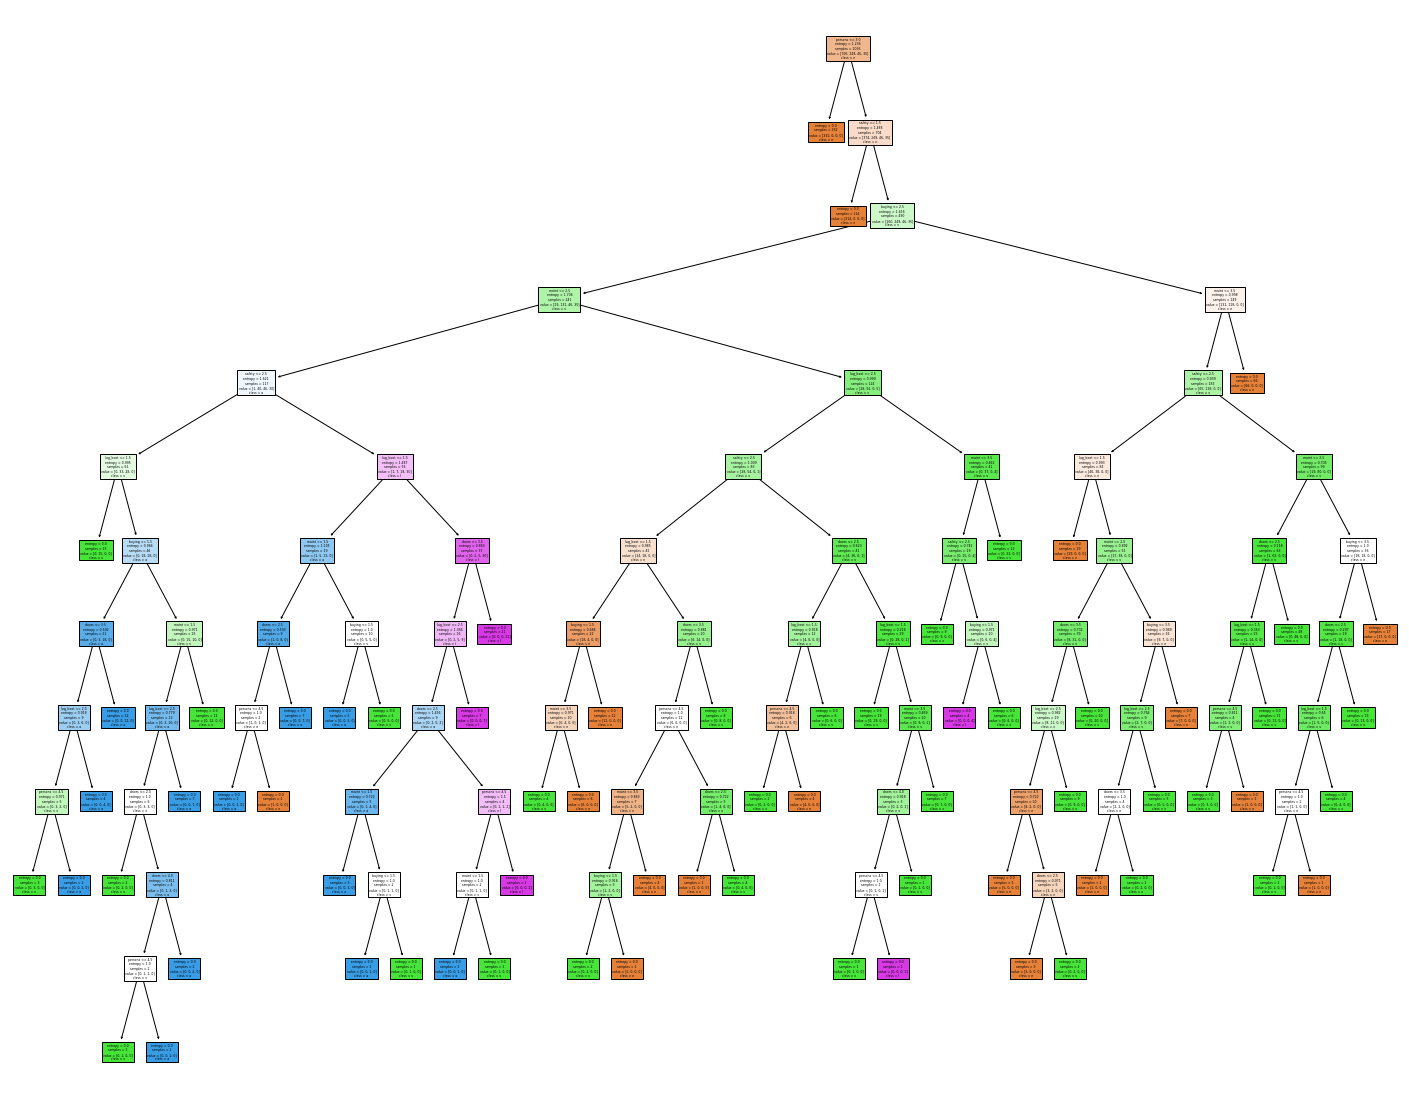

In [ ]:
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names='evaluation',
                   filled=True)

# Assessment and Tree Visualization

Print the accuracy of the model for training and test data.


In [ ]:
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))

Train Accuracy: 1.0
Test Accuracy: 0.9797687861271677


# Hyperprameter Tuning

Create a second model with a maximum tree depth of 9. How the accuracy is different from the first model. Comment on the results


In [ ]:
clf2 = tree.DecisionTreeClassifier( criterion='entropy', max_depth=9, random_state = 0)
clf2.fit(x_train, y_train)
y_pred_train2 = clf2.predict(x_train)
y_pred_test2 = clf2.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train2))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test2))


Train Accuracy: 0.983357452966715
Test Accuracy: 0.9624277456647399


Another important parameter is min_samples_leaf. Explain what this parameter represents. 

Create a third model with a min samples leaf of 3. How the accuracy is different from the first model. Comment on the results

In [ ]:
clf3 = tree.DecisionTreeClassifier( criterion='entropy', min_samples_leaf=3, random_state = 0)
clf3.fit(x_train, y_train)
y_pred_train3 = clf3.predict(x_train)
y_pred_test3 = clf3.predict(x_test)
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train3))
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test3))

Train Accuracy: 0.9898697539797395
Test Accuracy: 0.9682080924855492


# Cost Complextity Pruning

In the class, we discussed the notion of Cost Complexity Pruning. The sklearn library has a function 'cost_complexity_pruning_path', which returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. 

For more information refer to 
https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning

Drew the total impurity of leaves vs effective alpha for the first model. Comment on the results


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

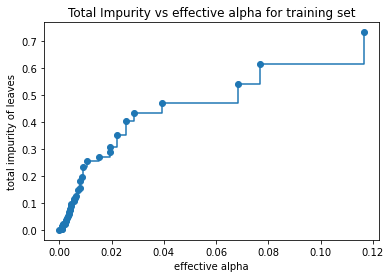

In [ ]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Compute a model for each effective alpha. Save models in a collection clfs 

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.23725700384184523


Create a graph showing the change in the number of nodes as the effective alph increases. Comment on the results.


Text(0.5, 1.0, 'Number of nodes vs alpha')

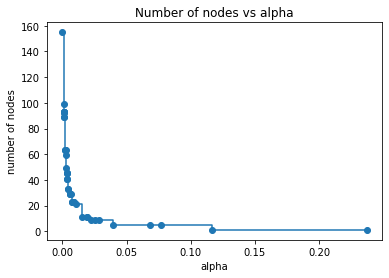

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]
fig, ax = plt.subplots()
ax.plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("number of nodes")
ax.set_title("Number of nodes vs alpha")



Now, show how the depth of the tree changes for different alphas

Text(0.5, 1.0, 'Depth vs alpha')

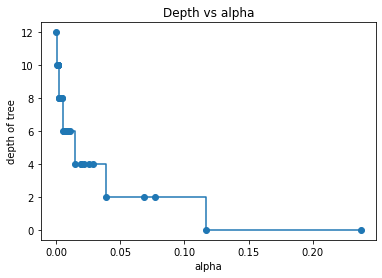

In [ ]:
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots()

ax.plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("depth of tree")
ax.set_title("Depth vs alpha")

Show the training and testing errors for different alphas. Comment on the results

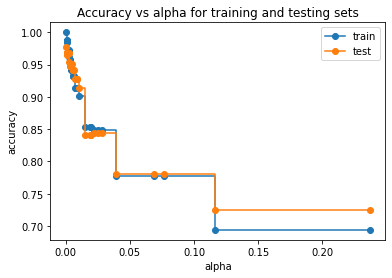

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()